In [44]:
import pandas as pd

df01 = pd.read_csv(r'data/origin/ex/0000004.csv',sep=';', names=['Num','X','Y','Dist'],dtype={'Num':'str'})
df01

,Num,X,Y,Dist
0,20,-8.660718,3.106462,NaN
1,22,-28.990161,3.747231,NaN
2,24,-84.429092,5.460118,NaN
3,25,-109.996486,0.344068,NaN
4,23,-59.318024,-0.941319,NaN
5,21,-11.044253,-2.162972,NaN
6,19,7.883008,-3.063069,NaN
7,17,57.229627,-4.465531,NaN
8,15,83.030155,-5.084494,NaN
9,14,106.386369,0.001604,NaN


In [45]:
df02 = pd.read_csv(r'data/origin/ex/0000005.csv',sep=';', names=['Num','X','Y','Dist'],dtype={'Num':'str'})
df02

,Num,X,Y,Dist
0,26,-10.340730,2.554477,NaN
1,28,-59.204688,1.595030,NaN
2,29,-90.283492,0.614403,NaN
3,30,-111.348544,-5.354379,NaN
4,29a,-90.106648,-5.159582,NaN
5,27,-27.537217,-3.404122,NaN
6,25,8.584244,-2.743366,NaN
7,23,59.259360,-1.339418,NaN
8,21,-53.765223,-93.123585,NaN
9,20,109.630899,5.389003,NaN


Дополнительный шаг - выборка номер одинаковых номеров пунктов.
Сортирую номера и записи в таблицы, надеюсь, что принцип сортировки и в сете и в дф одинаковые, но лучше будет убедиться.

In [46]:
inter = sorted(set(list(zip(*df01['Num'].iteritems()))[1]).intersection(set(list(zip(*df02['Num'].iteritems()))[1])))

df01_com = df01.loc[df01['Num'].isin(inter)].sort_values(by='Num')
df02_com = df02.loc[df02['Num'].isin(inter)].sort_values(by='Num')

In [47]:
inter
         

['20', '21', '22', '23', '24', '25']

Создаю по два набора точек - mp01,mp02 - все точки, включая стоянки. mp01_c, mp02_c - набор общих точек.

In [48]:
from shapely.geometry import MultiPoint

mp01 = MultiPoint([i[2:4] for i in df01.itertuples()])
mp01_c = MultiPoint([i[2:4] for i in df01_com.itertuples()])
mp02 = MultiPoint([i[2:4] for i in df02.itertuples()])
mp02_c = MultiPoint([i[2:4] for i in df02_com.itertuples()])

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline  

def plp(z,n):
    for p in z:        
        x = [i.x for i in p.geoms]
        y = [i.y for i in p.geoms]
        plt.figure(n)
        plt.plot(x,y,'ro')
        plt.plot(x,y,'ro')
    plt.show()

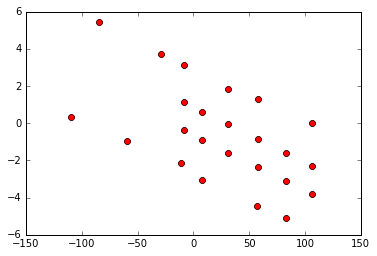

In [50]:
plp((mp01,),0)

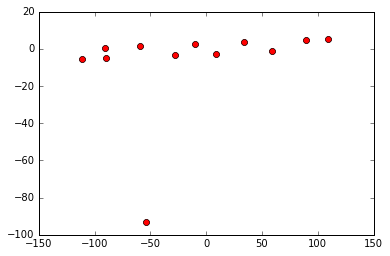

In [51]:
plp((mp02,),1)

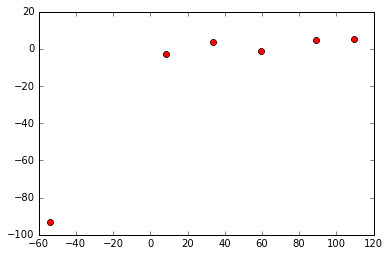

In [52]:
plp((mp02_c,),1)

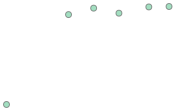

In [54]:
mp02_c

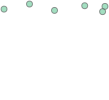

In [58]:
mp01_c

In [59]:
from shapely import affinity
from scipy.optimize import minimize,rosen_der

def mov(x,y,angle,geom):
    geom_r = affinity.rotate(geom,angle,origin=(0,0))
    geom_t = affinity.translate(geom_r,x,y)
    return geom_t

def calc_dist(geom1,geom2):
    dist = 0
    geom_list = zip(geom1,geom2)
    for item in geom_list:
        dist+=item[0].distance(item[1])
    return dist

def fun1(x0,geom1, geom2):
    x,y,angle = x0
    n_geom = mov(x,y,angle,geom2)
    return calc_dist(geom1,n_geom)

In [60]:
x0 = (0,0,0)

In [61]:
re = minimize(fun1,x0,args=(mp01_c[1:4],mp02_c[1:4]),method='BFGS')
re

      fun: 186.24793470315424
 hess_inv: array([[  2.95439790e-06,   4.31693662e-05,  -4.14678518e-05],
       [  4.31693662e-05,   6.67495292e-04,  -6.40178746e-04],
       [ -4.14678518e-05,  -6.40178746e-04,   6.14081692e-04]])
      jac: array([ 0.14598846, -0.00609589,  0.00640297])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 54
     njev: 140
   status: 2
  success: False
        x: array([-118.42305437,    3.53765298,   -3.0387694 ])

In [62]:
zz = mov(*re.x,mp02_c)
for i in zz:
    print(i.x,i.y)

-8.66062852740724 3.107361112230694
-177.0493143068938 -86.60480619652022
-28.989880942136608 3.7476559067276725
-59.318024293115 -0.9413188618785986
-84.42913645895808 5.460389363717115
-109.99631162537955 0.34307910990624757


In [63]:
zz = mov(*re.x,mp02)
for i in zz:
    print(i.x,i.y)

-128.6138268085741 6.636716989190653
-177.45993913278585 8.268979191020753
-208.54702773783623 8.937270983930517
-229.8988753986564 4.093575535263302
-208.67652085687484 3.1620299563253687
-146.10200882347837 1.5981111985192016
-109.99631162537955 0.34307910990624757
-59.318024293115 -0.9413188618785986
-177.0493143068938 -86.60480619652022
-8.66062852740724 3.107361112230694
-28.989880942136608 3.7476559067276725
-84.42913645895808 5.460389363717115


In [64]:
re2 = minimize(fun1,x0,args=(mp01_c,zz),method='BFGS')
re

      fun: 186.24793470315424
 hess_inv: array([[  2.95439790e-06,   4.31693662e-05,  -4.14678518e-05],
       [  4.31693662e-05,   6.67495292e-04,  -6.40178746e-04],
       [ -4.14678518e-05,  -6.40178746e-04,   6.14081692e-04]])
      jac: array([ 0.14598846, -0.00609589,  0.00640297])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 54
     njev: 140
   status: 2
  success: False
        x: array([-118.42305437,    3.53765298,   -3.0387694 ])

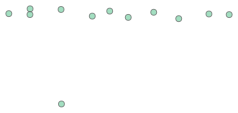

In [65]:
mp_moved = mov(*re.x,mp02)
mp_moved

In [66]:
plp(mp01_c,7)

AttributeError: 'Point' object has no attribute 'geoms'

In [67]:
plp(mov(*re.x,mp02_c),6)

AttributeError: 'Point' object has no attribute 'geoms'

Считаем расстояния от стоянки 99002 до всех точек.  
До сдвижки, после сдвижки, значение сдвижки.

In [68]:
dist_do = [mp02[-1].distance(i) for i in mp02]
dist_po = [mp_moved[-1].distance(i) for i in mp_moved]
od = zip(dist_do,dist_po)
od = [[i[0],i[1],i[0]-i[1]] for i in od]
df_od = pd.DataFrame.from_records(od,columns=('Before','After','Diff'))
df_od

,Before,After,Diff
0,44.200346,44.200346,0.000000e+00
1,93.073189,93.073189,1.421085e-14
2,124.166580,124.166580,1.421085e-14
3,145.476160,145.476160,2.842171e-14
4,124.268640,124.268640,0.000000e+00
5,61.793692,61.793692,2.131628e-14
6,26.074265,26.074265,-3.552714e-15
7,25.914278,25.914278,3.552714e-15
8,130.592870,130.592870,2.842171e-14
9,75.805036,75.805036,0.000000e+00


Расстояние между всеми точками:

In [69]:
all_l = []
for origin in mp02:
    nap = []
    for p in mp02:
        nap.append(origin.distance(p))
    all_l.append(nap)

all_2 = []
for origin in mp_moved:
    nap = []
    for p in mp_moved:
        nap.append(origin.distance(p))
    all_2.append(nap)

all_a = [list(zip(i[0],i[1])) for i in list(zip(all_l,all_2))]
all_a

[[(0.0, 0.0),
  (48.87337689463494, 48.87337689463492),
  (79.96630014875333, 79.96630014875333),
  (101.31697111713329, 101.31697111713328),
  (80.13805855053, 80.13805855053),
  (18.199562041439624, 18.19956204143961),
  (19.652525266541264, 19.652525266541264),
  (69.70892965482683, 69.70892965482683),
  (105.07130005473114, 105.07130005473113),
  (120.00510876953182, 120.00510876953182),
  (99.66582796494026, 99.66582796494025),
  (44.20034624269251, 44.20034624269251)],
 [(48.87337689463494, 48.87337689463492),
  (0.0, 0.0),
  (31.094271045623877, 31.094271045623884),
  (52.60490502210366, 52.60490502210366),
  (31.63156501064217, 31.631565010642184),
  (32.059636196575376, 32.059636196575376),
  (67.92761536042525, 67.92761536042524),
  (118.50038663315527, 118.50038663315526),
  (94.8746739994864, 94.87467399948639),
  (168.8782092575664, 168.87820925756637),
  (148.53888562721838, 148.53888562721838),
  (93.07318852899967, 93.07318852899965)],
 [(79.96630014875333, 79.966300148

Таблица с координатам сдвинутого 99002:

In [70]:
df2_nums = list(zip(*df02['Num'].iteritems()))[1]
al = list(zip(df2_nums,mp_moved))
mov_stag = [[i[0],i[1].x,i[1].y,al[-1][1].distance(i[1])] for i in al]
mov_df = pd.DataFrame.from_records(mov_stag,columns=('Num','X','Y','Dist'))
mov_df



,Num,X,Y,Dist
0,26,-128.613827,6.636717,44.200346
1,28,-177.459939,8.268979,93.073189
2,29,-208.547028,8.937271,124.166580
3,30,-229.898875,4.093576,145.476160
4,29a,-208.676521,3.162030,124.268640
5,27,-146.102009,1.598111,61.793692
6,25,-109.996312,0.343079,26.074265
7,23,-59.318024,-0.941319,25.914278
8,21,-177.049314,-86.604806,130.592870
9,20,-8.660629,3.107361,75.805036


Координаты 99001:

In [71]:
df01

,Num,X,Y,Dist
0,20,-8.660718,3.106462,NaN
1,22,-28.990161,3.747231,NaN
2,24,-84.429092,5.460118,NaN
3,25,-109.996486,0.344068,NaN
4,23,-59.318024,-0.941319,NaN
5,21,-11.044253,-2.162972,NaN
6,19,7.883008,-3.063069,NaN
7,17,57.229627,-4.465531,NaN
8,15,83.030155,-5.084494,NaN
9,14,106.386369,0.001604,NaN


Оригинальные координаты 990002:

In [72]:
df02

,Num,X,Y,Dist
0,26,-10.340730,2.554477,NaN
1,28,-59.204688,1.595030,NaN
2,29,-90.283492,0.614403,NaN
3,30,-111.348544,-5.354379,NaN
4,29a,-90.106648,-5.159582,NaN
5,27,-27.537217,-3.404122,NaN
6,25,8.584244,-2.743366,NaN
7,23,59.259360,-1.339418,NaN
8,21,-53.765223,-93.123585,NaN
9,20,109.630899,5.389003,NaN


In [73]:
df_stag = zip(df01.itertuples(),mov_df.itertuples())
list(df_stag)
staging = [[i[0][0],i[0][1],i[0][2],i[1][2],i[0][2]-i[1][2],i[0][3],i[1][3],i[0][3]-i[1][3],i[0][4],i[1][4],i[0][4]-i[1][4]] for i in list(df_stag)]

In [74]:
zz =  pd.concat([df01,mov_df.rename(columns={'Num':'Num'})]).fillna(0).groupby('Num', as_index=False).last()
zz

,Num,X,Y,Dist
0,14,106.386369,0.001604,0.000000
1,15,83.030155,-5.084494,0.000000
2,16,57.482335,1.323236,0.000000
3,17,57.229627,-4.465531,0.000000
4,18,31.073248,1.825374,0.000000
5,19,7.883008,-3.063069,0.000000
6,20,-8.660629,3.107361,75.805036
7,21,-177.049314,-86.604806,130.592870
8,22,-28.989881,3.747656,55.465706
9,23,-59.318024,-0.941319,25.914278


In [75]:
df01 = zz
df02 = pd.read_csv(r'data/chain/105.csv',sep=';', names=['Num','X','Y','Dist'],dtype={'Num':'str'})
df02

FileNotFoundError: File b'data/chain/105.csv' does not exist

In [125]:
inter = sorted(set(list(zip(*df01['Num'].iteritems()))[1]).intersection(set(list(zip(*df02['Num'].iteritems()))[1])))

df01_com = df01.loc[df01['Num'].isin(inter)].sort_values(by='Num')
df02_com = df02.loc[df02['Num'].isin(inter)].sort_values(by='Num')

In [126]:
mp01 = MultiPoint([i[2:4] for i in df01.itertuples()])
mp01_c = MultiPoint([i[2:4] for i in df01_com.itertuples()])
mp02 = MultiPoint([i[2:4] for i in df02.itertuples()])
mp02_c = MultiPoint([i[2:4] for i in df02_com.itertuples()])

In [130]:
x0 = (0,0,0)

re = minimize(fun1,x0,args=(mp01_c,mp02_c),method='SLSQP')

re

     fun: 0.00426196957177334
     jac: array([  -1.21600761,    1.9712386 , -560.31175013,    0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 498
     nit: 88
    njev: 88
  status: 0
 success: True
       x: array([ -494.04349035,  3402.32346331,    13.98854554])

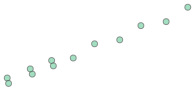

In [131]:
mp_moved = mov(*re.x,mp02)
mp_moved

In [132]:
df2_nums = list(zip(*df02['Num'].iteritems()))[1]
al = list(zip(df2_nums,mp_moved))
mov_stag = [[i[0],i[1].x,i[1].y,al[-1][1].distance(i[1])] for i in al]
mov_df = pd.DataFrame.from_records(mov_stag,columns=('Num','X','Y','Dist'))
mov_df

,Num,X,Y,Dist
0,609,-14508.085613,-446.117557,75.313632
1,608,-14486.660032,-431.841115,49.955337
2,610,-14529.792545,-448.635295,96.241950
3,611,-14549.225133,-462.265510,119.435671
4,612,-14574.382649,-466.186257,144.161730
5,610a,-14528.056404,-454.027120,96.753435
6,611a,-14551.228058,-457.041346,119.266772
7,612a,-14573.031527,-471.629786,144.996283
8,607,-14461.388582,-427.842827,25.570046
9,605,-14414.776804,-409.600672,25.691876


In [133]:
zz =  pd.concat([df01,mov_df.rename(columns={'Num':'Num'})]).fillna(0).groupby('Num', as_index=False).last()
zz

,Num,X,Y,Dist
0,593,-14133.887400,-299.583600,0.000000
1,594,-14159.244600,-303.605200,0.000000
2,595,-14180.551200,-317.862700,0.000000
3,596,-14205.796800,-321.824000,0.000000
4,597,-14227.175700,-336.142800,0.000000
5,597a,-14229.019800,-330.917400,0.000000
6,598,-14252.268910,-340.045658,51.162629
7,599,-14274.391879,-354.624764,25.844611
8,600,-14299.915662,-358.684370,0.000000
9,601,-14321.163836,-372.931709,25.582642


In [134]:
df01 = zz
df02 = pd.read_csv(r'data/chain/106.csv',sep=';', names=['Num','X','Y','Dist'],dtype={'Num':'str'})
inter = sorted(set(list(zip(*df01['Num'].iteritems()))[1]).intersection(set(list(zip(*df02['Num'].iteritems()))[1])))

df01_com = df01.loc[df01['Num'].isin(inter)].sort_values(by='Num')
df02_com = df02.loc[df02['Num'].isin(inter)].sort_values(by='Num')
mp01 = MultiPoint([i[2:4] for i in df01.itertuples()])
mp01_c = MultiPoint([i[2:4] for i in df01_com.itertuples()])
mp02 = MultiPoint([i[2:4] for i in df02.itertuples()])
mp02_c = MultiPoint([i[2:4] for i in df02_com.itertuples()])
x0 = (0,0,0)

re = minimize(fun1,x0,args=(mp01_c,mp02_c),method='SLSQP')
mp_moved = mov(*re.x,mp02)

In [137]:
re

     fun: 4.236177418337145
     jac: array([   1.99254447,   -0.40828776,  221.74558228,    0.        ])
 message: 'Iteration limit exceeded'
    nfev: 545
     nit: 101
    njev: 101
  status: 9
 success: False
       x: array([ -405.84391151,  3067.52073644,    12.65462041])

In [138]:
inter

['610', '610a', '611', '611a', '612', '612a']

In [136]:
df2_nums = list(zip(*df02['Num'].iteritems()))[1]
al = list(zip(df2_nums,mp_moved))
mov_stag = [[i[0],i[1].x,i[1].y,al[-1][1].distance(i[1])] for i in al]
mov_df = pd.DataFrame.from_records(mov_stag,columns=('Num','X','Y','Dist'))
mov_df

,Num,X,Y,Dist
0,612,-14574.506644,-465.178297,24.894722
1,611,-14549.211001,-462.285522,5.594790
2,613,-14596.914747,-478.751945,50.814175
3,614,-14620.621286,-481.361715,73.766592
4,615,-14643.239990,-494.780231,99.684099
5,613a,-14599.453386,-473.751012,51.273215
6,614a,-14619.703802,-486.664942,74.841707
7,615a,-14639.901496,-488.013992,94.161997
8,612a,-14573.378611,-470.672027,26.233544
9,610a,-14527.723964,-454.916681,23.366804


g